# Plotting examples
This example will show how to make various types of data visualisations in matplotlib/plotly

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from src.data.data import Data
data = Data()

[SUCCESS]: Data initialisation done


## Load data

In [7]:
# Here we give a name to the test that we will put the data in
testname = 'EXAMPLE_RAUL'

# Here we define the list of sensor ids we want to download
devices = ['10604', '10605', '10606', '10607', '10608', '10609', 
           '10610', '10611', '10612', '10613', '10614', '10616']

blueprint = 'sck_21'

# Here we specify the different options for data load
options = {'frequency': '5Min',
            'min_date': '2020-01-07',
            'max_date': '2020-01-25',
            'clean_na': "drop"
            }

# Other example for options
# options = {'frequency': '1Min',
#             'min_date': None,
#             'max_date': None,
#             'clean_na': None
#             }

In [8]:
# Add devices to list. You don't need to touch anything here
from src.data.device import Device
tdevices = list()
for device in devices:
    tdevices.append(Device(blueprint = blueprint, descriptor = {'id': device, 
                                                                'source': 'api'
                                                                }))

In [9]:
# We load the data based on the input above
data.load_devices(testname, tdevices, options = options)

[SUCCESS]: Add device 10604 OK
[SUCCESS]: Add device 10605 OK
[SUCCESS]: Add device 10606 OK
[SUCCESS]: Add device 10607 OK
[SUCCESS]: Add device 10608 OK
[SUCCESS]: Add device 10609 OK
[SUCCESS]: Add device 10610 OK
[SUCCESS]: Add device 10611 OK
[SUCCESS]: Add device 10612 OK
[SUCCESS]: Add device 10613 OK
[SUCCESS]: Add device 10614 OK
[SUCCESS]: Add device 10616 OK
Creating new test
[SUCCESS]: Test update Finished
Processing files
Test 2020-04_INT_EXAMPLE_RAUL path: /Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-data/data/processed/2020/04/2020-04_INT_EXAMPLE_RAUL
[SUCCESS]: Test creation finished
Loading test 2020-04_INT_EXAMPLE_RAUL
Using options: {'cached_data_margin': 1, 'load_cached_api': True, 'store_cached_api': True, 'clean_na': 'drop', 'frequency': '5Min', 'min_date': '2020-01-07', 'max_date': '2020-01-25'}
---------------------------
Loading device 10604
Device 10604 is located at 41.396867, 2.194351
Device 10604 

'2020-04_INT_EXAMPLE_RAUL'

## Explore that data

Some examples for different plots are shown here. The available plots are:
- [Time series plot](## Time Series)
- Time series comparison (report)
- Corr plot
- Scatter plot matrix
- Violin plot
- Target diagram
- Coherence plot

In [10]:
from src.visualization.visualization import Plot

## Time Series Plots

Preparing data for plot
Making 2 subplots
Plotting
Reducing width to 12
Reducing height to 10


<Figure size 432x288 with 0 Axes>

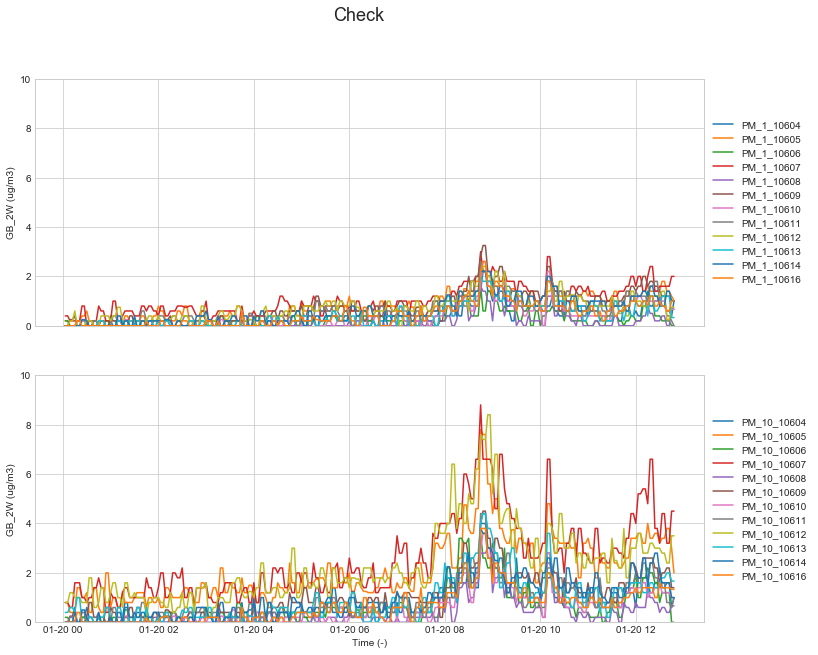

In [19]:
plot_description = {"type": "timeseries",
                    "library": "matplotlib",
                    "data": {"test": '2020-04_INT_EXAMPLE_RAUL',
                                    "traces": {"1": {"device": 'all',
                                                    "channel" : "PM_1",
                                                    "subplot": 1},
                                              "2": {"device": 'all',
                                                    "channel" : "PM_10",
                                                    "subplot": 2}}},
                    "options": {"show_plot": True,
                                "export_path": None, 
                                "file_name": None,
                                "frequency": '3Min',
                                "clean_na": 'fill',
                                "clean_na_method": '',
                                "max_date": None,
                                "min_date": '2020-01-20'},
                    "formatting": {"xlabel": "Time (-)",
                                   "ylabel": {1: "GB_2W (ug/m3)", 2: "GB_2W (ug/m3)"},
                                   "yrange": {1: [0, 10], 2: [0, 10]},
                                   "title": "Check",
                                   "legend": True,
                                   "sharex":True,
                                   "grid": True,
                                   "height": 800,
                                   "width": 800,
                                   "style": "seaborn-whitegrid"}
                    }

plot_object = Plot(plot_description)
plot_object.plot(data)
# plot_object.export_plot()

### Correlation Plot
The plot_wrapper instance below is faster to generate. Alternatively, a more GUI _ish_ experience can be found using: [corr_plot](src_ipynb/corr_plot.ipynb)

%run src_ipynb/corr_plot.ipynb

In [ ]:
plot_description = {"plot_type": "correlation_plot",
                    "plotting_library": "matplotlib",
                    "data": {"test": "2019-03_EXT_UCD_URBAN_BACKGROUND_API",
									"traces": {"1": {"device": "5261",
													"channel" : "HUM",
													"subplot": 1},
                                              "2": {"device": "5262",
                                                   "channel": "TEMP",
                                                   "subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": "/Users/macoscar/Desktop", 
                                "file_name": "plot_corr",
                                "frequency": '10Min',
                                "min_date": None,
                                "max_date": None},
                    "formatting": {"jpkind": 'scatter',
                                   "title": "Magnificent plot",
                                   "xrange": [40, 90],
                                   "yrange": [5, 20],
                                   "grid": True,
                                   "height": 10,
                                   "width": 15}
                    }

'''
"jpkind" { “scatter” | “reg” | “resid” | “kde” | “hex” }
'''

plot_object = plot_wrapper(plot_description, True)
plot_object.plot(data)
plot_object.export_plot()

### Coherence plot

In [ ]:
plot_description = {"plot_type": "coherence_plot",
                    "plotting_library": "matplotlib",
                    "data": {"test": "2019-03_EXT_UCD_URBAN_BACKGROUND_API",
									"traces": {"1": {"device": "5262",
													"channel" : "GB_2W",
													"subplot": 1},
                                              "2": {"device": "5262",
                                                   "channel": "TEMP",
                                                   "subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": "/Users/macoscar/Desktop", 
                                "file_name": "plot_coherence",
                                "frequency": '10Min',
                                "min_date": None,
                                "max_date": None},
                    "formatting": {"title": "Magnificent plot",
                                   "grid": True,
                                   "height": 10,
                                   "width": 15}
                    }


from src.visualization.visualization import plot_wrapper

plot_object = plot_wrapper(plot_description, True)
plot_object.plot(data)
plot_object.export_plot()

### Scatter plot matrix

The plot_wrapper instance below is faster to generate. Alternatively, a more GUI _ish_ experience can be found using: [scatter_plot](src_ipynb/scatter_plot.ipynb)

%run src_ipynb/scatter_plot.ipynb

In [ ]:
plot_description = {"plot_type": "scatter_matrix",
                    "plotting_library": "matplotlib",
                    "data": {"test": "2019-10_INT_GROW_PARROT COMPARISON",
									"traces": {"1": {"device": "10232",
													"channel" : "CHRP_MOIS",
													"subplot": 1},
                                              "2": {"device": "10260",
                                                   "channel": "CHRP_MOIS",
                                                   "subplot": 1},
                                              "3": {"device": "10261",
                                                   "channel": "CHRP_MOIS",
                                                   "subplot": 1},
                                              "4": {"device": "PARROT_1",
                                                   "channel": "calibrated_soil_moisture_percent",
                                                   "subplot": 1},
                                              "5": {"device": "PARROT_2",
                                                   "channel": "calibrated_soil_moisture_percent",
                                                   "subplot": 1},
                                              "6": {"device": "PARROT_3",
                                                   "channel": "calibrated_soil_moisture_percent",
                                                   "subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": "/Users/macoscar/Desktop", 
                                "file_name": "plot_scatter",
                                "frequency": '10Min',
                                "min_date": '2019-10-11 14:00:00',
                                "max_date": None},
                    "formatting": {"title": "",
                                   "grid": True,
                                   "height": 4,
                                   "width": 4}
                    }


from src.visualization.visualization import plot_wrapper

plot_object = plot_wrapper(plot_description, True)
plot_object.plot(data)
plot_object.export_plot()

### Heat Map

In [ ]:
plot_description = {"plot_type": "heatmap",
                    "plotting_library": "matplotlib",
                    "data": {"test": "HASSELT",
                    				"traces": {"1": {"device": "10014",
                                        			"channel" : "EXT_PM_25",
                                        			"subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": "/Users/macoscar/Desktop", 
                                "file_name": "plot_heat",
                                "frequency": '10Min',
                                "min_date": None,
                                "max_date": '2019-01-03',
                                "relative": False},
                    "formatting": {"title": "Magnificent plot",
                                   "grid": True,
                                   "height": 10,
                                   "width": 15,
                                   "frequency_hours": 6}
                    }


from src.visualization.visualization import plot_wrapper

plot_object = plot_wrapper(plot_description, True)
plot_object.plot(data)
plot_object.export_plot()

### Violin plot

In [ ]:
plot_description = {"plot_type": "violin",
                    "plotting_library": "matplotlib",
                    "data": {"test": "2019-03_EXT_UCD_URBAN_BACKGROUND_API",
                    				"traces": {"1": {"device": "5262",
                                                      "channel" : "DALLAS_TEMP",
                                                    "subplot": 1},
                                                "2": {"device": "5262",
                                                       "channel" : "HUM",
                                                       "subplot": 1},
                                                 "3": {"device": "5262",
                                                       "channel" : "TEMP",
                                                       "subplot": 1},
                                                 "4": {"device": "5262",
                                                       "channel" : "GB_2W",
                                                       "subplot": 1},
                                                 "5": {"device": "5262",
                                                       "channel" : "GB_2A",
                                                       "subplot": 1},
                                                 "6": {"device": "5262",
                                                       "channel" : "GB_3W",
                                                       "subplot": 1}}},
                    "options": {"show_plot": True,
                                "separate_device_plots": False,
                                "export_path": "/Users/macoscar/Desktop", 
                                "file_name": "plot_violin",
                                "frequency": '10Min',
                                "min_date": None,
                                "max_date": '2019-01-03',
                                "relative": False,
                                "ylabel": {1: "External temperature",
                                           2: "Humidity (%RH)",
                                           3: "Temperature (degC)",
                                           4: "Wir",
                                           5: "Wor",
                                           6: "Wur"},
                                "yrange": {1: [0, 90],
                                           2: [300, 2000],
                                           3: [0, 60],
                                           4: [0, 60],
                                           5: [0,60],
                                           6: [0,60]},
                               },
                    "formatting": {"title": "Magnificent plot",
                                   "grid": True,
                                   "height": 10,
                                   "width": 15}
                    }


from src.visualization.visualization import plot_wrapper

plot_object = plot_wrapper(plot_description, True)
plot_object.plot(data)
plot_object.export_plot()

## Alphasense Baseline


These functions are used to create the alphasense pollutant correction based on Working, Auxiliary and calibration data provided by alphasense.

In [ ]:
# ------- INPUT VARIABLE BELOW -------

# Input delta in minutes
baseline_method = 'deltas' # 'deltas', 'als'

# For deltas method (in minutes, except overlapHours)
min_delta = 5
max_delta = 45
delta_delta = 5
overlapHours = 0

# For ALS method
lam_als = [1e3, 1e4] # We only iterate over lambda
p_als = 0.01 # Change by hand in different runs

# Wrap it up
methods= {"NO2": ["baseline", "single_aux"]}

variables = list()

if baseline_method == 'deltas':
    append_name = baseline_method[:].upper() + '_OVL_' + str(overlapHours) + '-' + str(min_delta) + '-' +str(max_delta)
             
    variables.append(np.arange(min_delta, max_delta, delta_delta))

elif baseline_method == 'als':
    append_name = baseline_method[:].upper() + '_OVL_' + str(overlapHours) + '-LAMBDA_' + str(lam_als[0]) + '-' +str(lam_als[-1]) + '_P_'+ str(p_als)

    variables.append([lam_als, p_als])
    
variables.append(methods)
variables.append(overlapHours)
variables.append(baseline_method)

options = dict()
options['checkBoxDecomp'] = False
options['checkBoxPlotsIn'] = False
options['checkBoxPlotsResult'] = False
options['checkBoxVerb'] = False
options['checkBoxStats'] = False

# ------------------------------------
        
data.calculate_alphasense(testname, variables, options)

### Baseline Model Metrics

In [ ]:
## Explore results
# test = '2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS'
test = selectedTestsAD[0]
# device = 'STATION CHIMNEY'
device = '5262'
dataframe = records.readings[test]['devices'][device]['alphasense']['model_stats'][ad_name]

pollutant = 'NO2'

# pollutant_avg 	pollutant_max 	pollutant_min 	pollutant_std 	r2_valueRef 	

fig, (ax, ax2)= plt.subplots(nrows = 2, figsize= (15,10))
ax.plot(dataframe[pollutant]['pollutant_avg'], dataframe[pollutant]['r2_valueRef'], 'o', label=pollutant)
#ax.set_xlim([0,1.5])
ax.set_ylim([0,1])
# plt.setp(ax.xaxis.get_majorticklabels(), rotation=70 )

ax2.bar(dataframe[pollutant].index,dataframe[pollutant]['pollutant_avg'], label=pollutant)
ax2.bar(dataframe[pollutant].index,dataframe[pollutant]['pollutant_max'], label=pollutant, alpha= 0.3)
ax2.bar(dataframe[pollutant].index,dataframe[pollutant]['pollutant_min'], label=pollutant, alpha= 0.3)
ax2.set_ylim([0,100])
#ax.plot(dataframe['O3'].index,dataframe['O3']['pollutant_avg'],'ro', label='O3')
# plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70 )

plt.xlabel('Day')
plt.title('Average pollutant concentration')
plt.legend(loc='best')

### TODO: Correction Checks

In [ ]:
# Sample For stats checks
pollutant = 'NO2'
display(CorrParams[pollutant])

with plt.style.context('seaborn-white'):
    fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
            
    ax1.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['avg_temp'], label = 'Temp', linestyle='-', linewidth=0, marker='o')
    ax1.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['avg_hum'] , label = 'Hum', linestyle='-', linewidth=0, marker='o')
    ax2.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['stderr_temp'], label = 'Temp', linestyle='-', linewidth=0, marker='o')
    ax2.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['stderr_hum'] , label = 'Hum', linestyle='-', linewidth=0, marker='o')
    
    ax1.legend(loc='best')
    ax1.set_xlabel('R^2 {} vs Ref'.format(pollutant))
    ax1.set_ylabel('Avg Temp-Hum / day')
    ax1.grid(True)
    ax2.legend(loc='best')
    ax2.set_xlabel('R^2 {} vs Ref'.format(pollutant))
    ax2.set_ylabel('Avg Temp / day')
    ax2.grid(True)
    
    fig2, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
            
    ax3.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['avg_pollutant'], label = 'Avg Pollutant', linestyle='-', linewidth=0, marker='o')
    ax4.plot(CorrParams[pollutant]['avg_pollutant'], CorrParams[pollutant]['deltaAuxBas_avg'], label = 'Delta', linestyle='-', linewidth=0, marker='o')
    ax4.plot(CorrParams[pollutant]['avg_pollutant'], CorrParams[pollutant]['ratioAuxBas_avg'] , label = 'Ratio', linestyle='-', linewidth=0, marker='o')
    
    ax3.legend(loc='best')
    ax3.set_xlabel('R^2 {} vs Ref'.format(pollutant))
    ax3.set_ylabel('Avg {} / day'.format(pollutant))
    ax3.grid(True)
    ax4.legend(loc='best')
    ax4.set_xlabel('{} Average'.format(pollutant))
    ax4.set_ylabel('Offset / Ratio Baseline vs Auxiliary')
    ax4.grid(True)

## Model Creation

### Ordinary Linear Regression

Check [here](../references/linear_regression.md) the preliminary checks and model assumptions

In [ ]:
testname = '2019-03_EXT_UCD_URBAN_BACKGROUND_API'
devicename = 'CITY_COUNCIL'
print (data.tests[testname].devices[devicename].readings.columns)

In [ ]:
from src.models.model_tools import model_wrapper

# Input model description
model_description = {"model_name": "OLS_UCD",
                    "model_type": "OLS",
                    "model_target": "ALPHASENSE",
                    "data": {"train": {testname: devicename},
                            "reference_device" : "CITY_COUNCIL",
                            "features":  {"REF": "NO2_REF",
                                            "A": "GB_2W",
                                            "B": "GB_2A",
                                            "C": "HUM"},
                            "options": {"frequency": '1Min',
                                        "clean_na": True,
                                        "clean_na_method": "fill",
                                        "min_date": None,
                                        "max_date": '2019-01-15'},
                            "expression" : 'REF ~ A + np.log(B)'
                            },
                    "hyperparameters": {"ratio_train": 0.75},
                    "options": {"session_active_model": True,
                                "show_plots": True,
                                "export_model": False,
								"export_model_file": False,
								"extract_metrics": True}
                    }


# --- 
# Init OLS model
ols_model = model_wrapper(model_description, verbose = True)

# Prepare dataframe for modeling
records.prepare_dataframe_model(ols_model)
                    
# Train Model based on training dataset
train_dataset = list(ols_model.data['train'].keys())[0]
ols_model.training(records.readings[train_dataset]['models'][ols_model.name])

# Get prediction for dataset
device = ols_model.data['train'][train_dataset]
prediction_name = device + '_' + model_name
prediction = ols_model.predict_channels(records.readings[train_dataset]['devices'][device]['data'], prediction_name)

# Combine it in readings
records.readings[train_dataset]['devices'][device]['data'].combine_first(prediction)

'''# Preliminary Check
    Fuller Plot for all
    for column in dataframeModel:
        x = dataframeModel.loc[:,column]
        tfuller_plot(x, name = x.name, lags=60, lags_diff = 5)
    Granger Causality
    print ('--------------------------------------')
    print ('Granger Causality Test')
     Granger Causality Test (WIP)
    for item in tuple_features:
        if item[0] != 'REF':
            print '\nCausality for x1 = {} and x2 = {}'.format(reference_name, item[1])
            x = dataframeModel.loc[:,[reference_name, item[1]]].dropna()
            x = x.values
            granger_causality_tests = grangercausalitytests(x, 1)
            print granger_causality_test
'''

# Archive model
if ols_model.options['session_active_model']:
    dataFrameExport = ols_model.dataFrameTrain.copy()
    dataFrameExport = dataFrameExport.combine_first(ols_model.dataFrameTest)
    records.archive_model(train_dataset, ols_model, dataFrameExport)

# Print metrics
print ('Metrics Summary:')
print ("{:<23} {:<7} {:<5}".format('Metric','Train','Test'))
if ols_model.options['extract_metrics']:
    metrics_model = ols_model.extract_metrics()
    for metric in metrics_model['train'].keys():
        print ("{:<20}".format(metric) +"\t" +"{:0.3f}".format(metrics_model['train'][metric]) +"\t"+ "{:0.3f}".format(metrics_model['test'][metric]))

### LSTM

In [ ]:
from src.models.model_tools import model_wrapper

# Input model description
model_description = {"model_name": "LSTM_UCD",
                    "model_type": "LSTM",
                    "model_target": "ALPHASENSE",
                    "data": {"train": {"2019-03_EXT_UCD_URBAN_BACKGROUND_API": "5262"},
                            "reference_device" : "CITY_COUNCIL",
                            "features":  {"REF": "NO2_REF",
                                            "A": "GB_2W",
                                            "B": "GB_2A",
                                            "C": "HUM"},
                            "options": {"target_raster": '5Min',
                                        "clean_na": True,
                                        "clean_na_method": "fill",
                                        "min_date": None,
                                        "max_date": '2019-01-15'},
                            },
                    "hyperparameters": {"n_lags": 2,
                                        "epochs": 10,
                                        "batch_size": 72,
                                        "verbose": True,
                                        "loss": "mse",
                                        "optimizer": "adam",
                                        "ratio_train": 0.75},
                    "options": {"session_active_model": True,
                                "show_plots": True,
                                "export_model": False,
								"export_model_file": False,
								"extract_metrics": True}
                    }


# --- 
# Init rf model
lstm_model = model_wrapper(model_description, verbose = True)

# Prepare dataframe for modeling
records.prepare_dataframe_model(lstm_model)
                    
# Train Model based on training dataset
train_dataset = list(lstm_model.data['train'].keys())[0]
lstm_model.training(records.readings[train_dataset]['models'][lstm_model.name])

# Get prediction for dataset
device = lstm_model.data['train'][train_dataset]
prediction_name = device + '_' + lstm_model.name
prediction = lstm_model.predict_channels(records.readings[train_dataset]['devices'][device]['data'], prediction_name)

# Combine it in readings
records.readings[train_dataset]['devices'][device]['data'].combine_first(prediction)

# Archive model
if lstm_model.options['session_active_model']:
    dataFrameExport = lstm_model.dataFrameTrain.copy()
    dataFrameExport = dataFrameExport.combine_first(lstm_model.dataFrameTest)
    records.archive_model(train_dataset, lstm_model, dataFrameExport)

# Print metrics
print ('Metrics Summary:')
print ("{:<23} {:<7} {:<5}".format('Metric','Train','Test'))
if lstm_model.options['extract_metrics']:
    metrics_model = lstm_model.extract_metrics()
    for metric in metrics_model['train'].keys():
        print ("{:<20}".format(metric) +"\t" +"{:0.3f}".format(metrics_model['train'][metric]) +"\t"+ "{:0.3f}".format(metrics_model['test'][metric]))

### Random Forest Regressor or SVR

Find parameters for grid search with cross-validation and random search [here](src_ipynb/cross_validation_rf.ipynb)

In [ ]:
from src.models.model import model_wrapper

# Input model description
model_description = {"model_name": "RF_UCD",
                    "model_type": "RF",
                    "model_target": "ALPHASENSE",
                    "data": {"train": {"2019-03_EXT_UCD_URBAN_BACKGROUND_API": {"devices": ["5262"],
                                                                               "reference_device": "CITY_COUNCIL"}},
                            "test": {"2019-03_EXT_UCD_URBAN_BACKGROUND_API": {"devices": ["5565"],
                                                                               "reference_device": "CITY_COUNCIL"}},
                            "features":  {"REF": "NO2_CONV",
                                            "A": "GB_2W",
                                            "B": "GB_2A",
                                            "C": "HUM"},
                            "data_options": {"target_raster": '1Min',
                                            "clean_na": True,
                                            "clean_na_method": "drop",
                                            "min_date": None,
                                            "frequency": "1Min",
                                            "max_date": '2019-01-15'},
                            },
                    "hyperparameters": {"ratio_train": 0.75, 
                                        "min_samples_leaf": 2,
                                        "max_features": None,
                                       "n_estimators": 100,
										"shuffle_split": True},
                    "model_options": {"session_active_model": True,
                                "show_plots": True,
                                "export_model": False,
								"export_model_file": False,
								"extract_metrics": True}
                    }

# --- 
# Init rf model
rf_model = model_wrapper(model_description, verbose = True)

# Prepare dataframe for modeling
test_name = data.prepare_dataframe_model(rf_model)
                    
# Train Model based on training dataset
rf_model.train()

# Get prediction for train device
device = rf_model.data['train'][test_name]['devices'][0]
prediction_name = device + '_' + rf_model.name
prediction = rf_model.predict(data.tests[test_name].devices[device].readings, prediction_name)
# Combine it in readings
data.tests[test_name].devices[device].readings.combine_first(prediction)

# Archive model
if rf_model.options['session_active_model']:
    data.archive_model(rf_model)

# Print metrics
if rf_model.options['extract_metrics']:
    metrics_model = rf_model.extract_metrics('train')

In [ ]:
rf_model.export(data.modelDirectory)

## Model Comparison

### TimeSeries Comparison

In [ ]:
import matplotlib.pyplot as plt
import plotly.tools as tls
%matplotlib inline

fig = plt.figure(figsize=(20,10))
referencePlotted = False

test_model = "2019-03_EXT_UCD_URBAN_BACKGROUND_API"

for model_name in records.readings[test_model]['models']:
    try:
        ratio_train = records.readings[test_model]['models'][model_name]['model_object'].hyperparameters['ratio_train']
        data = records.readings[test_model]['devices'][model_name]['data']
                
        total_len = len(data.index)
        n_train_periods = int(round(total_len*ratio_train))
    
        dataframeTrain = data.iloc[:n_train_periods,:]
        dataframeTest = data.iloc[n_train_periods:,:]
                        
        if (not referencePlotted):
            plt.plot(dataframeTrain.index, dataframeTrain['reference'], 'b.-', label = 'Reference Train', alpha = 0.6)
            plt.plot(dataframeTest.index, dataframeTest['reference'], 'b.-', label = 'Reference Test', alpha = 0.6)
            referencePlotted = True
            
        plt.plot(dataframeTrain.index, dataframeTrain['prediction'], 'r', linewidth = 0.6, label = 'Prediction Train ' + model_name, alpha = 0.6)
        plt.plot(dataframeTest.index, dataframeTest['prediction'], 'r', linewidth = 0.6, label = 'Prediction Test ' + model_name, alpha = 0.6)
    except:
        pass

plt.legend(loc = 'best')
plt.title('Model Comparison for ' + test_model)
plt.ylabel(str(records.readings[test_model]['models'][model_name]['reference']))
plt.xlabel('Date (-)')
plt.grid(True)


### Scatter Comparison

In [ ]:
import matplotlib.pyplot as plot
from matplotlib import gridspec
import pandas as pd
import math
import numpy as np
%matplotlib inline

number_of_subplots = len(records.readings[test_model]['models'].keys()) 
if number_of_subplots % 2 == 0: cols = 2
else: cols = 3
rows = int(math.ceil(number_of_subplots / cols))
gs = gridspec.GridSpec(rows, cols)
fig = plot.figure(figsize=(20,10))

fig.tight_layout()
n = 0

for model_name in records.readings[test_model]['models']:

    ratio_train = records.readings[test_model]['models'][model_name]['model_object'].hyperparameters['ratio_train']
    
    data = records.readings[test_model]['devices'][model_name]['data']
    dataVal = data.groupby(pd.Grouper(freq='1H')).aggregate(np.mean)    
    total_len = len(dataVal.index)
    n_train_periods = int(round(total_len*ratio_train))
    
    dataframeTrain = dataVal.iloc[:n_train_periods,:]
    dataframeTest = dataVal.iloc[n_train_periods:,:]
    
    ax = fig.add_subplot(gs[n])
    n += 1          
    plot.plot(dataframeTrain['reference'], dataframeTrain['prediction'], 'go', label = 'Train ' + model_name, alpha = 0.3)
    plot.plot(dataframeTest['reference'], dataframeTest['prediction'], 'bo', label = 'Test ' + model_name, alpha = 0.3)
    plot.plot(dataframeTrain['reference'], dataframeTrain['reference'], 'k', label = '1:1 Line', linewidth = 0.4, alpha = 0.3)
    
    plot.legend(loc = 'best', prop={'size': 8})
    plot.ylabel('Prediction (-)')
    plot.xlabel('Reference (-)')
    plot.show()

### Target diagram

Model Metrics Comparison using target diagram

In [ ]:
from src.visualization.visualization import targetDiagram
%matplotlib inline

models = dict()
for model in records.readings[test_model]['models']:

        print ('\nModel Name: {}'.format(model))
        print ("{:<23} {:<7} {:<5}".format('Metric','Train','Test'))
        metrics_model = records.readings[test_model]['models'][model]['model_object'].extract_metrics()
        models[model] = metrics_model
        for metric in metrics_model['train'].keys():
            print ("{:<20}".format(metric) +"\t" +"{:0.3f}".format(metrics_model['train'][metric]) +"\t"+ "{:0.3f}".format(metrics_model['test'][metric]))
        
targetDiagram(models, True)

## Model Application

In [ ]:
%run src_ipynb/apply_model.ipynb

In [ ]:
#### Data Quality Objectives (TO CHECK)
Explained here http://dx.doi.org/10.1016/j.envint.2016.12.007

Sensor values Y, reference values x

In [ ]:
from scipy.stats.stats import linregress
import matplotlib.pyplot as plot
import numpy as np
%matplotlib inline

def fUEREL(ux, values_x, values_Y):
    def RSS(values_x, values_Y, intercept, slope):
        pre_sum_1 = np.power(values_Y - intercept - np.multiply(slope, values_x), 2)
        # pre_sum_2 = np.power(values_Y / (intercept + np.multiply(slope, values_x)) - 1, 2)
        
        # fig, axes = plot.subplots(1, 2, figsize=(15,10))
        # axes[0].plot(pre_sum_1)
        # axes[1].plot(pre_sum_2)

        RSS = np.sum(np.power(pre_sum_1,2))
        
        return RSS
    
    slope, intercept, _, _, _ = linregress(values_x, values_Y)
    # fig = plot.figure(figsize=(15,10))
    # plot.plot(slope*values_x + intercept, label='Sensor')
    # plot.plot(values_Y)
    
    RSS = RSS(values_x, values_Y, intercept, slope)
    n = len(values_x)
    if len(values_Y) != n: return
    A = RSS/(n-2)-np.power(ux,2)
    B = np.power(intercept + (slope-1)*values_x, 2)
    C = np.power(A + B, 0.5)
    UEREL = np.divide(2*C, values_Y)
    
    return UEREL

In [ ]:
import matplotlib.pyplot as plot
from matplotlib import gridspec
import math

dqo_table = (['PM', 50],
            ['O3', 30],
            ['CO',25],
            ['NO',25],
            ['NO2',25],
            ['NOX',25],
            ['SO2',25])

ux = 0
test_model = '2019-02_EXT_DUBLIN_URBAN_BACKGROUND'

## ---
number_of_subplots = len(records.readings[test_model]['models'].keys()) 

if number_of_subplots % 2 == 0: cols = 2
else: cols = 3
    
rows = int(math.ceil(number_of_subplots / cols))
gs = gridspec.GridSpec(rows, cols)
fig = plot.figure(figsize=(15,10))

fig.tight_layout()
n = 0

for model in records.readings[test_model]['models']:
    try:
        data = records.readings[test_model]['devices'][model]['data']
        dataVal = data.groupby(pd.Grouper(freq='1H')).aggregate(np.mean)
        values_x = dataVal['reference'].values
        values_Y = dataVal['prediction'].values
        
        total_len = len(data.index)
        n_train_periods = int(round(total_len*ratio_train))
    
        ax = fig.add_subplot(gs[n])
        n += 1      
    
        uerel = 100*fUEREL(ux, values_x, values_Y)
        
        plot.plot(values_x, uerel, 'ko')
        plot.xlabel('Ref. conc [ppb]')
        plot.ylabel('Rel. Exp. Unc (%)')
        plot.ylim([0, 100])
        plot.title(model)
        plot.axhline(y=25, color='r', linestyle='-')
    except:
        pass
            